<a href="https://colab.research.google.com/github/Sid44444/001-fundamentals/blob/master/linear_regression_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

### Install dependencies
- What this installs: `numpy`, `pandas`, `matplotlib`, `scikit-learn`
- When to run: On Colab, run this cell. On a local machine, skip if already installed.

In [ ]:
!pip install -q numpy pandas matplotlib scikit-learn

# Linear Regression

<b>What this notebook is about</b>

In this notebook we look at a very simple kind of machine learning called linear regression. The idea is to fit a straight line through a cloud of data points so that we can predict one quantity (for example, house price) from another (for example, size in square metres). We’ll see:

- That a linear regression model learns the “best” straight line through the data

- How to visualise the line and the errors (called residuals)

- How changing the amount of noise in the data affects the line the model learns

You don’t need to understand the maths in detail – the focus is on building an intuition for what the model is doing and how to read the plots.

# =====================================================
# 0. Setup
# =====================================================

### Imports and plot style
- `numpy` for arrays and random numbers
- `matplotlib.pyplot as plt` for charts
- `sklearn.linear_model.LinearRegression` for the regression model
- Plot style:
  - `plt.rcParams["figure.figsize"] = (6, 4)` sets a readable figure size
  - `plt.rcParams["figure.dpi"] = 120` makes lines and text look crisp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Make plots look a bit nicer
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 120

# =====================================================
# 1. Create some synthetic data
#    y = 3x + 5 + noise
# =====================================================

### Create a simple linear dataset
- **Reproducibility:** `np.random.seed(42)` ensures the same random numbers each run.
- **Data set-up:**
  - `N_POINTS` controls how many samples you generate (feel free to change)
  - The underlying rule is `y = true_slope * x + true_intercept + noise`
  - `np.linspace(0, 10, N_POINTS)` creates evenly spaced x‑values
  - `noise = np.random.normal(0, 2, size=N_POINTS)` adds randomness
- **Shape note (easy to trip up on):**
  - Scikit‑learn expects `X` to be 2D, so we use `X.reshape(-1, 1)` to get shape `(n_samples, 1)`.

In [ ]:
np.random.seed(42)

N_POINTS = 50  # <- students can change this
true_slope = 3.0
true_intercept = 5.0

X = np.linspace(0, 10, N_POINTS)
noise = np.random.normal(0, 2, size=N_POINTS)
y = true_slope * X + true_intercept + noise

# sklearn expects 2D X: shape (n_samples, n_features)
X_2d = X.reshape(-1, 1)

# =====================================================
# 2. Fit linear regression model
# =====================================================

### Fit a Linear Regression model
- **Model:**
  - `model = LinearRegression()` constructs a straight‑line model
  - `model.fit(X_2d, y)` learns the best‑fitting line from data
- **Predictions:**
  - `preds = model.predict(X_2d)` gives the model’s predicted y‑values
- **What the prints mean:**
  - `coef_[0]` is the learned slope (how much y changes per 1 unit of x)
  - `intercept_` is the learned y‑value when `x = 0`

In [ ]:
model = LinearRegression()
model.fit(X_2d, y)

preds = model.predict(X_2d)

print("Learned slope (m):", model.coef_[0])
print("Learned intercept (b):", model.intercept_)

Learned slope (m): 2.8840332010163547
Learned intercept (b): 5.128886184405948


# =====================================================
# 3. Plot data + fitted line
# =====================================================

### Visualise the fitted line with the data
- Scatter the original data: `plt.scatter(X, y, label="Data points")`
- Plot the fitted line: `plt.plot(X, preds, label="Fitted line", linewidth=2)`
  - Using the same `X` draws a straight line over the scatter
- Label axes, add a title and legend, then `plt.show()` to render the figure

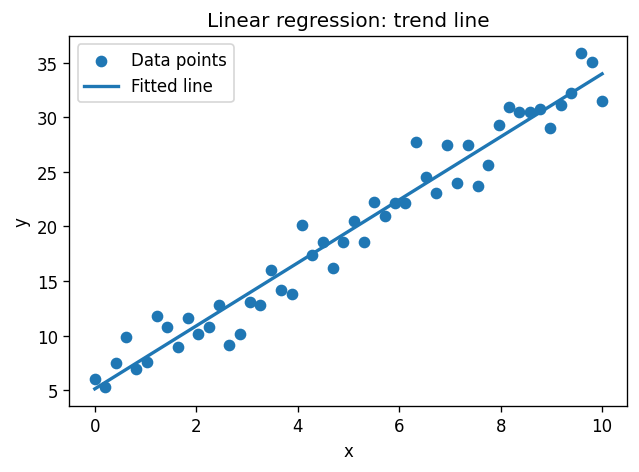

In [ ]:
plt.scatter(X, y, label="Data points")
plt.plot(X, preds, label="Fitted line", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression: trend line")
plt.legend()
plt.show()

# =====================================================
# 4. Residuals (errors)
#    residual = actual - predicted
# =====================================================

### Visualise residuals (errors) on the plot
- Residual = actual − predicted (vertical distance from point to the line)
- The loop draws a red vertical line from each point to the fitted line:
  - `plt.plot([xi, xi], [yi, yhat], "r-", alpha=0.5)`
  - `alpha=0.5` makes the lines semi‑transparent so overlaps are readable
- Use labels, title, legend as before; `plt.show()` to render
- **What to look for**:
  - If residuals look random around the line, a straight line is a reasonable fit
  - Clear patterns suggest non‑linearity or uneven noise

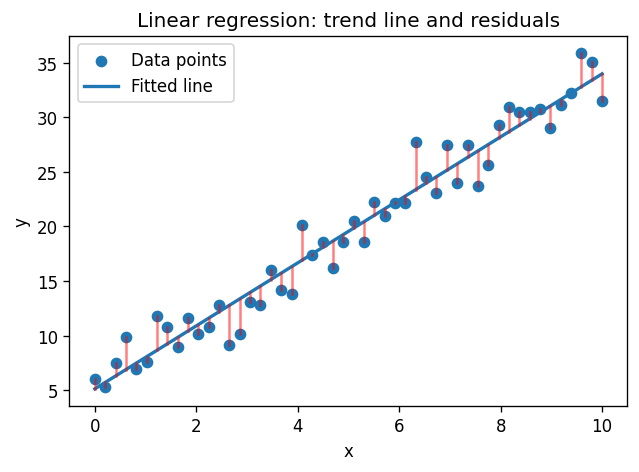

In [ ]:
plt.scatter(X, y, label="Data points")
plt.plot(X, preds, label="Fitted line", linewidth=2)

# Residuals: vertical red lines from each point to the line
for xi, yi, yhat in zip(X, y, preds):
    plt.plot([xi, xi], [yi, yhat], "r-", alpha=0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression: trend line and residuals")
plt.legend()
plt.show()

# =====================================================
# 4. Students can adjust the parameters below!
# =====================================================

### Change parameters and re‑fit
- **Function:** `generate_and_plot(noise_std, slope, intercept)` regenerates data and re‑fits the model
  - The values given in the code are starting defaults — feel free to change them
  - `noise_std` controls how scattered the points are
  - `slope` and `intercept` set the underlying true line
- **The plot shows**:
  - Data scatter, fitted line, and red residual lines for intuition
- **Printed outputs:**
  - Learned slope and intercept from the model (may differ from the “true” ones due to noise)
- **Tip:** Re‑run the cell after changing parameters to see how the line and residuals change

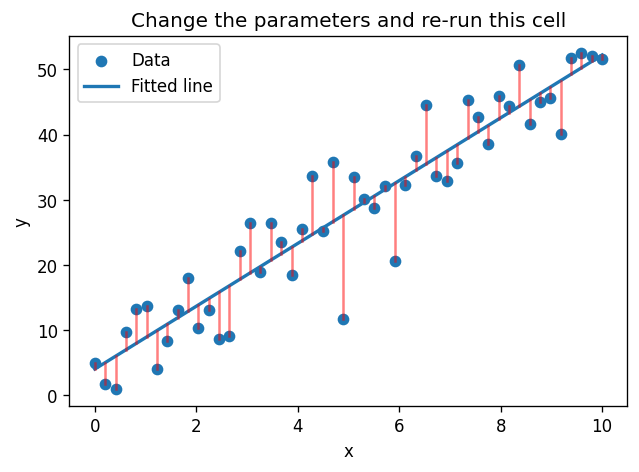

Learned slope: 4.8171470711017434
Learned intercept: 4.020949867298995


In [ ]:
def generate_and_plot(noise_std=10.0, slope=3.0, intercept=5.0):
    X = np.linspace(0, 10, N_POINTS)
    noise = np.random.normal(0, noise_std, size=N_POINTS)
    y = slope * X + intercept + noise
    X_2d = X.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_2d, y)
    preds = model.predict(X_2d)

    plt.scatter(X, y, label="Data")
    plt.plot(X, preds, label="Fitted line", linewidth=2)

    # Residuals again
    for xi, yi, yhat in zip(X, y, preds):
        plt.plot([xi, xi], [yi, yhat], "r-", alpha=0.5)

    plt.title("Change the parameters and re-run this cell")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    print("Learned slope:", model.coef_[0])
    print("Learned intercept:", model.intercept_)

# Example usage:
#  - ask them to change the numbers below and re-run the cell
generate_and_plot(noise_std=6.0, slope=5.0, intercept=3.0)